# Semana 2: Dense Layers
#### Equipo 5:
Jackeline Conant Rubalcava A01280544 \
Javier Eduardo Corrales Cardoza A01742328 \
José Andrés Orantes Guillén A01174130 \
Francisco Salas Porras A01177893 \
Luis Mario Lozoya Chairez A00833364


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np

Primero se cargan los datos que se usarán para el ejercicio. En este caso se utilizarán los datos de Fashion Mnist, este dataset cuenta con 70,000 imágenes en escala de grises en escala de 28x28. Se tienen 70,000 productos de moda de 10 diferentes categorías, 7,000 imágenes por categoría. El set de entrenamiento cuenta con 60,000 imágenes y el de prueba con 10,000.<br>
Tenemos el propósito de predecir las categorías de cada prenda a través de un modelo neuronal de capas densas.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
num_classes=len(class_names)

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

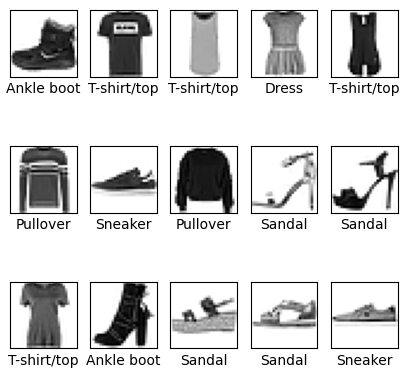

In [7]:
plt.figure(figsize=(5,5))
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Iniciamos la construcción del modelo que realizará las predicciones de clasificación de cada imagen.

In [18]:
model = tf.keras.models.Sequential([
    keras.Input(shape=(28, 28, 1)),  # Entrada de imagen de 28(alto)x 28(ancho) con 1 canal (escala de grises)
    layers.Flatten(),                # Aplana la imagen de 28x28 en un vector de 784 elementos
    layers.Dense(64, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(num_classes, activation="softmax")  # softmax para clasificación multiclase
])

In [19]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,978 (328.04 KB)

 Trainable params: 83,978 (328.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.1)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7356 - loss: 0.7880 - val_accuracy: 0.8530 - val_loss: 0.4178
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8585 - loss: 0.3962 - val_accuracy: 0.8640 - val_loss: 0.3767
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.3521 - val_accuracy: 0.8530 - val_loss: 0.3877
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8813 - loss: 0.3217 - val_accuracy: 0.8745 - val_loss: 0.3537
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.3130 - val_accuracy: 0.8768 - val_loss: 0.3415
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8912 - loss: 0.2913 - val_accuracy: 0.8808 - val_loss: 0.3255
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9003 - loss: 0.2724 - val_accuracy: 0.8800 - val_loss: 0.3328
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9033 - loss: 0.2614 - val_accuracy: 0.

In [21]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8752 - loss: 0.3438


[0.34405893087387085, 0.8755999803543091]